In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%load_ext autoreload
%autoreload 2 

In [2]:
import networkx

In [3]:
from networkcommons.visual._vis_networkx import NetworkVisualizerBase, NetworkXVisualizer
from networkcommons.visual._styles import *

In [5]:
import networkx as nx

G = nx.DiGraph()
G.add_node('Node1', type='source')
G.add_node('Node2', type='none')
G.add_node('Node3', type='none')
G.add_node('Node4', type='target')
G.add_edge('Node1', 'Node2', effect=1)
G.add_edge('Node2', 'Node3', effect=1)
G.add_edge('Node3', 'Node4', effect=-1)

net_vis = NetworkXVisualizer(G)
source_dict = {"Node1": 1}
target_dict = {"Node4": -1}

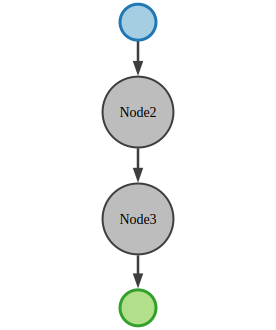

In [6]:
net_vis.visualize_network_default(source_dict, target_dict)

In [24]:
import networkx as nx
import pandas as pd
import os

# Helper function to load network from CSV
def load_network_from_csv(filename):    
    full_path = f"demo_networks/{filename}"
    df = pd.read_csv(full_path)
    G = nx.DiGraph()
    
    for _, row in df.iterrows():
        G.add_node(row['Node1'], sign=row['Type'])
        G.add_node(row['Node2'], sign=row['Type'])
        G.add_edge(row['Node1'], row['Node2'], sign=row['Effect'])
    
    return G

# Load networks
small_network = load_network_from_csv("small_network.csv")
medium_network = load_network_from_csv("medium_network.csv")
large_network = load_network_from_csv("large_network.csv")
extra_large_network = load_network_from_csv("extra_large_network.csv")

/Users/nw240/Downloads/networkcommons_temp230824/networkcommons/visual/vis_demo


Demonstrating NetworkVisualizerBase with a small network:


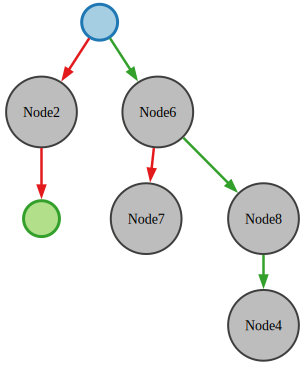

Small network visualization saved as small_network_visualization.png


In [25]:
# Demonstrate the NetworkVisualizerBase


print("Demonstrating NetworkVisualizerBase with a small network:")
visualizer = NetworkVisualizerBase(small_network)
visualizer.visualize_network_simple(source_dict={'Node0': 1}, target_dict={'Node9': -1})
print("Small network visualization saved as small_network_visualization.png")


Demonstrating NetworkXVisualizer with a medium network:


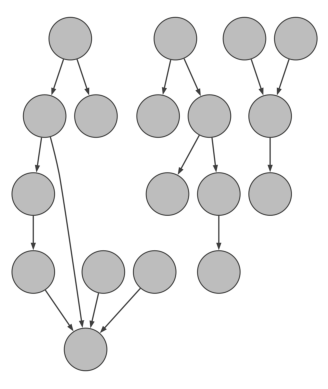

Medium network visualization saved as medium_network_visualization.png


In [26]:
print("\nDemonstrating NetworkXVisualizer with a medium network:")

# Hiding lables, increasing the size
custom_node_styles = {
    'other': {
        'default': {
            'label': '',
            'width': 1.2, 
        }
    }
}

# Modify target_dict to use nested dictionary
target_dict = {
    'Node10': {'sign': -1}
}

visualizer = NetworkXVisualizer(medium_network)
# Apply custom styles
visualizer.set_custom_style({'nodes': custom_node_styles})
visualizer.visualize(source_dict={'Node0': 1}, target_dict={'Node18': -1}, output_file="medium_network_visualization.png", 
                    style=visualizer.style)
visualizer.visualize(render=True, style=visualizer.style)
print("Medium network visualization saved as medium_network_visualization.png")

In [27]:
print("\nVisualizing large and extra-large networks might take longer...")

# Large network
visualizer = NetworkXVisualizer(large_network)
#this is too big of a network to show here, but can be viewed in the file
#visualizer.visualize_network_simple(source_dict={'Node0': 1}, 
#                                    target_dict={'Node99': -1}, max_nodes=600)
visualizer.visualize(output_file="large_network_visualization.png")
print("Large network visualization saved as large_network_visualization.png")


Visualizing large and extra-large networks might take longer...
Large network visualization saved as large_network_visualization.png


In [29]:
import networkx as nx
from networkcommons.visual import NetworkXVisualizer

# Create a small directed network
small_network = nx.DiGraph()
edges_small = [('Node1', 'Node2'), ('Node2', 'Node3'), ('Node3', 'Node4'), 
               ('Node4', 'Node5')]

# Add edges with a 'sign' attribute
for i, edge in enumerate(edges_small):
    sign = 1 if i % 2 == 0 else -1  # Alternate between positive and negative signs
    small_network.add_edge(edge[0], edge[1], sign=sign)

# Initialize the visualizer
visualizer = NetworkXVisualizer(small_network)
small_network.add_edges_from(edges_small)

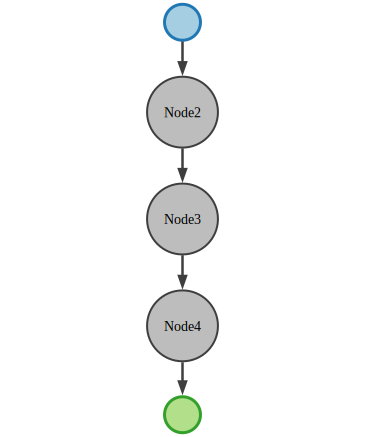

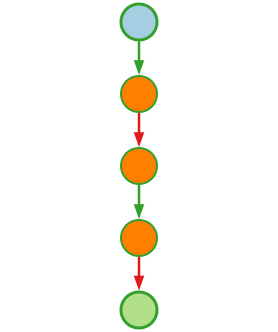

In [40]:
# Initialize the visualizer
visualizer = NetworkXVisualizer(small_network)

# Set source and target nodes for demonstration
source_dict = {'Node1': 1}
target_dict = {'Node5': 1}

# Visualize the network with default settings
visualizer.visualize_network_default(source_dict, target_dict)

source_dict = {'Node1': {'sign': 1}}
target_dict = {'Node5': {'sign': -1}}
visualizer.visualize_network(source_dict, target_dict, network_type="sign_consistent")

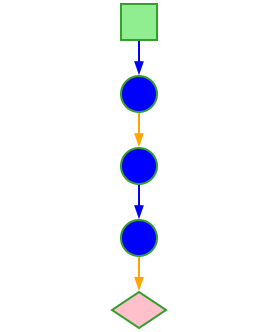

In [41]:
# Custom styles for nodes and edges
custom_node_styles = {
    'sources': {
        'shape': 'square',
        'color': 'green',
        'fillcolor': 'lightgreen',
        'penwidth': 2,
        'size': 10
    },
    'targets': {
        'shape': 'diamond',
        'color': 'red',
        'fillcolor': 'pink',
        'penwidth': 2
    }, 
    'other': {
        'default': {
            'shape': 'circle', 
            'fillcolor': 'blue', 
            'label': ''
        }
    }
}

custom_edge_styles = {
    'positive': {
        'color': 'blue',
        'penwidth': 2
    },
    'negative': {
        'color': 'orange',
        'penwidth': 2
    }
}

# Modify target_dict to use nested dictionary
target_dict = {
    'Node5': {'sign': -1}
}

# Apply custom styles
visualizer.set_custom_style({'nodes': custom_node_styles, 'edges': custom_edge_styles})
visualizer.visualize_network(source_dict, target_dict, network_type="sign_consistent", custom_style=visualizer.style)